# Přehled funkcí

Scipy je knihovna poskytující monožství základních algoritmů pro numerické výpočty a zpracování dat. Je úzce navázána na NumPy. Většina algoritmů jsou standardní implementace v C a Fortranu přičemž SciPy k nim poskytuje jednotné a elegantní Pythoní rozhraní.

Přehled funkcí s odkazy do dokumentace:

- [**Speciální matematické funkce**](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html) 
  [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) Beselovy funkce, eliptické funkce, jejich derivace a další 

- **Numerická integrace řešení ODE**
  [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate), 
      - adaptivní numerická integrace funkcí v 1D, 2D, 3D. Ve 2D a 3D jsou hranice oblastí dané funkcemi.  
      - integrace diferenciálních rovnic: počáteční úlohy `solve_ivp`, okrajové úlohy `solve_bvp`

- [**Optimalizace a nelineární rovnice**](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
  [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)
  Gradientní (lokální) metody pro nevázané a vázané minimalizační problémy, 'globální' optimalizace, řešení soustav nelineární algebraických rovnic
  
- [**Interpolace**](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
  [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)
  Interpolace polynomi a spline funkcemi v 1D (a 2D).

- [**Fourierova transformace**](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)
  [`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack)
  Diskrétní fuourierova transformace a její varianty, diskrétní konvoluce.
  
- [**Zpracování signálu**](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)
  [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)
  Filtry, konvoluce, spektrum, ...
  
- [**Lineární algebra**](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
  [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
  Funkce z `numpy.linalg` plus podpora pokročilejších algoritmů. 

    - [**Vlastní čísla pro řídké matice (ARPACK)**](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)  
      [`scipy.sparse.linalg.eigs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html#scipy.sparse.linalg.eigsscipy.)

- [**Práce s prostorovými daty**](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html)
  [`scipy.spatial`](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial)
  Triangulace, Voronoi diagramy, konvexní obaly
  
- [**Statistika a pravděpodobnost**](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
  [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
  Distribuční funkce, hustoty a generátory pro různá rozdělení. Vybraný vektorové náhodné veličiny. Odhady parametrů,
  testování hypotéz, ...
  
- [**Zpracování obrazu**](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html)
  [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)

  

## Řešení rovnic


In [1]:
# Solving equation `x^n == 1` v komplexním oboru, pomocí Newtonovy metody

import scipy.optimize as opt

degree = 3

def fun(x):
    re, im = x
    z = complex(re, im)
    fz = z**degree - 1
    fz
    return [fz.real, fz.imag ]

def fprime(x):
    re, im = x
    z = complex(re, im)
    dfdz = degree*z**(degree - 1)
    return [[ dfdz.real, dfdz.imag], [-dfdz.imag, dfdz.real ]]
    
def get_root(z0_ar):
    #res = opt.root(fun, z0_ar, method='krylov' )
    #re, im = res.x
    
    #re, im = opt.fsolve(fun, z0_ar, fprime=fprime)
    re, im = opt.fsolve(fun, z0_ar, maxfev=20)
    
    root_idx = degree * np.angle(complex(re, im))/2/np.pi
    return root_idx
    
    


/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 20.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


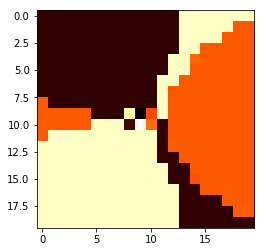

In [3]:
import matplotlib.pyplot as plt
import numpy as np

side = np.linspace(-2,2, 20)
X, Y = np.meshgrid(side, side)
xy = np.stack((X,Y), axis=2)
Z = np.zeros_like(X)
Z = np.apply_along_axis(get_root, 2, xy)
    
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

## Optimization, non-linear least squares

In [ ]:
# Parametric non-linear model
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# Artificial data with noise.
xdata = np.linspace(0, 5, 50)
beta = (0.25, 0.75, 0.5)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

# Misfit function
def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)
beta_opt


In [ ]:
fig, ax = plt.subplots()
# Plot data
ax.scatter(xdata, ydata)
# Plot exact func
ax.plot(xdata, y, 'r', lw=2)
# Plot fit
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


## Interpolace, Aproximace

### Čebyševovy polynomy

In [ ]:
import numpy.polynomial as P

p = P.Polynomial.fromroots([1,2,3])
x=np.linspace(0,4,100)
plt.plot(x, p(x))
plt.plot(x, np.zeros_like(x))
plt.show()

In [ ]:
import numpy.linalg as la

def cheb_sin(deg):
    x_sample = np.linspace(0, 2*np.pi, deg)
    y_sample = np.sin(x_sample)
    A = P.chebyshev.chebvander(x_sample, len(x_sample)-1)
    c = la.solve(A, y_sample)
    return P.Chebyshev(c)
    
fig,ax  = plt.subplots(2, 2, figsize=(12, 7))
    
i_func = cheb_sin(5)    
x=np.linspace(0, 2*np.pi, 200)
ax[0][0].plot(x, np.sin(x), c='r')
ax[0][0].plot(x, i_func(x), c='g')
ax[1][0].plot(x, np.sin(x) - i_func(x))

i_func = cheb_sin(10)
ax[0][1].plot(x, np.sin(x), c='r')
ax[0][1].plot(x, i_func(x), c='g')
ax[1][1].plot(x, np.sin(x) - i_func(x))
plt.show()


## Spline interpolation

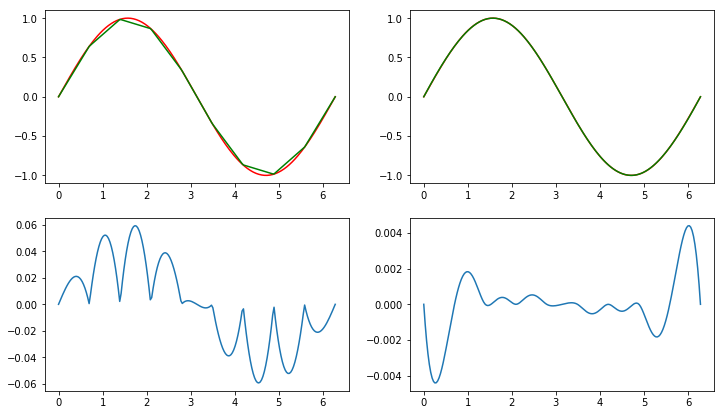

In [4]:
import scipy.interpolate as interpolate

def spline_sin(N, deg):
    x_sample = np.linspace(0, 2*np.pi, N)
    y_sample = np.sin(x_sample)
    return interpolate.interp1d(x_sample, y_sample, kind=deg)
    
fig,ax  = plt.subplots(2, 2, figsize=(12, 7))
    
i_func = spline_sin(10,1)    
x=np.linspace(0, 2*np.pi, 200)
ax[0][0].plot(x, np.sin(x), c='r')
ax[0][0].plot(x, i_func(x), c='g')
ax[1][0].plot(x, np.sin(x) - i_func(x))

i_func = spline_sin(10,3)
ax[0][1].plot(x, np.sin(x), c='r')
ax[0][1].plot(x, i_func(x), c='g')
ax[1][1].plot(x, np.sin(x) - i_func(x))
plt.show()

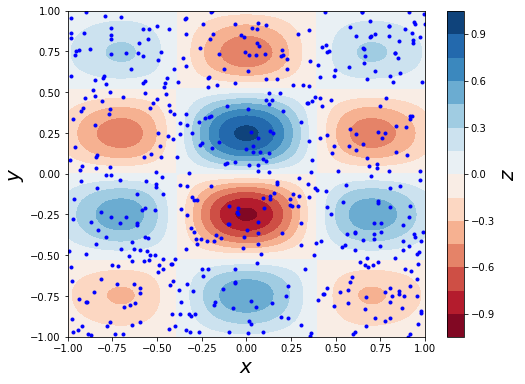

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# random 2d sample points
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
# samples
zdata = f(xdata, ydata)

# Plot function and sample points
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.', c='b')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)
plt.show()

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


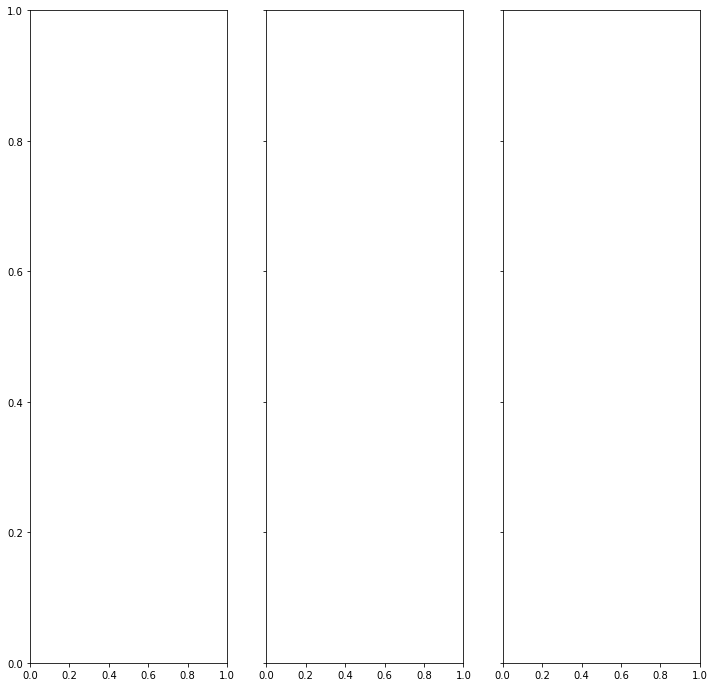

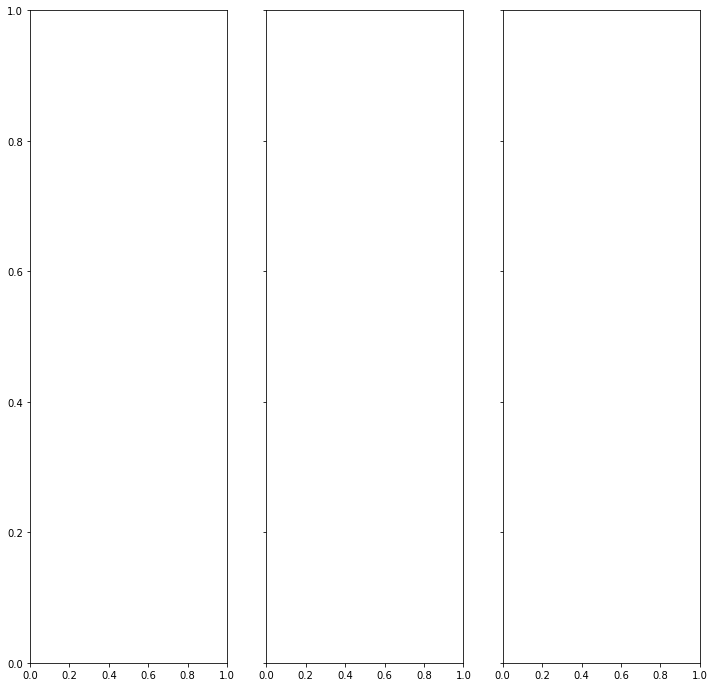

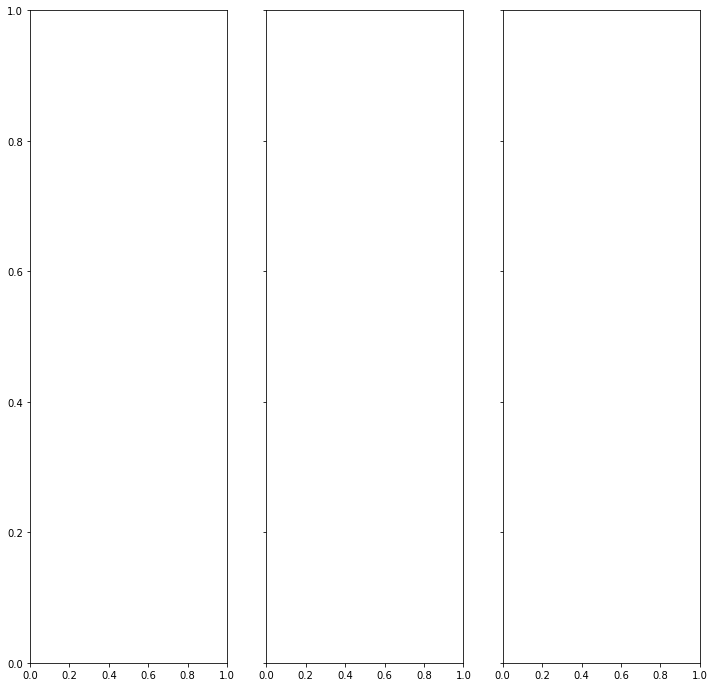

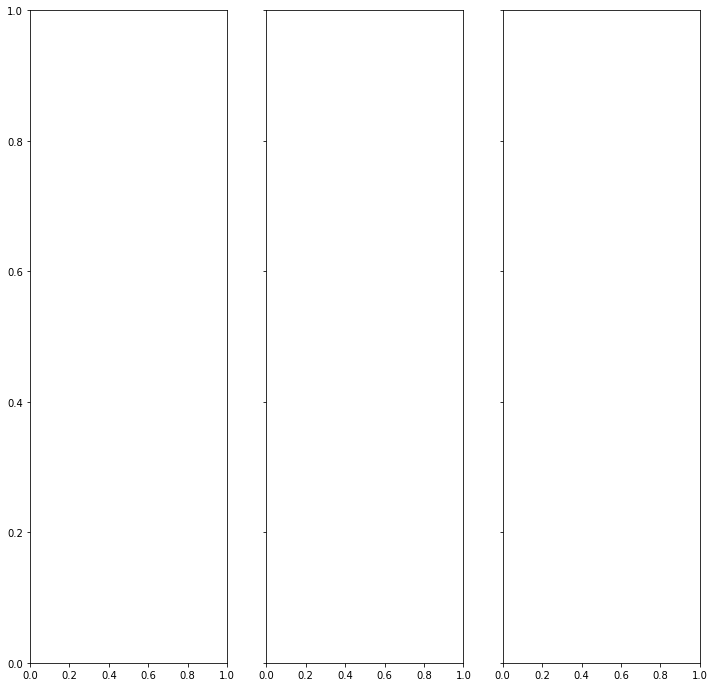

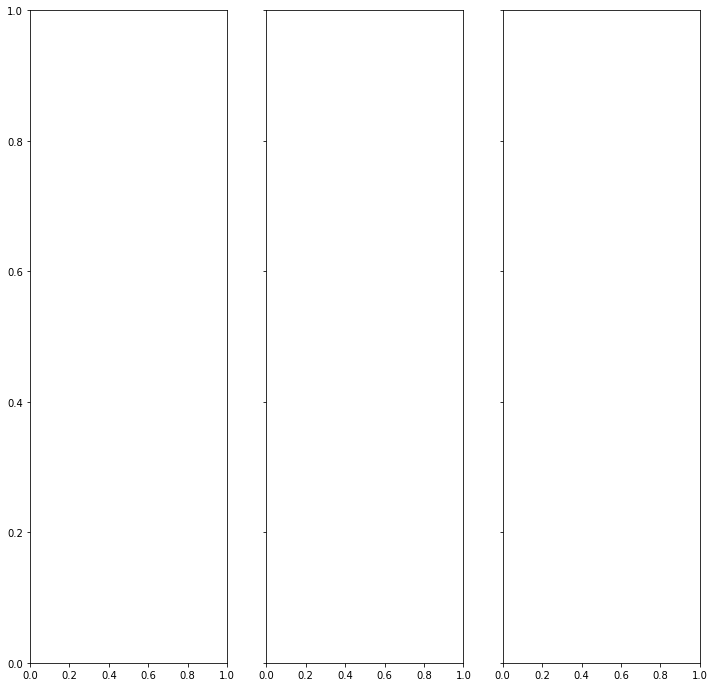

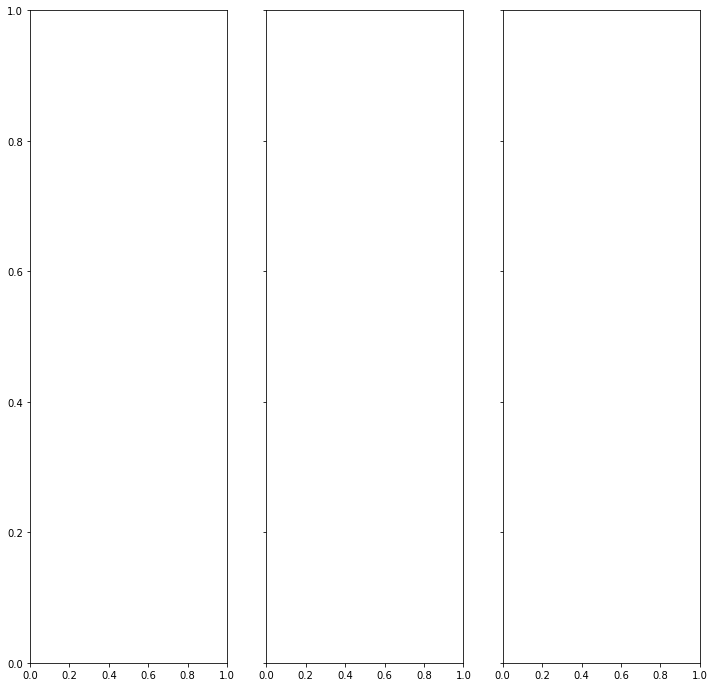

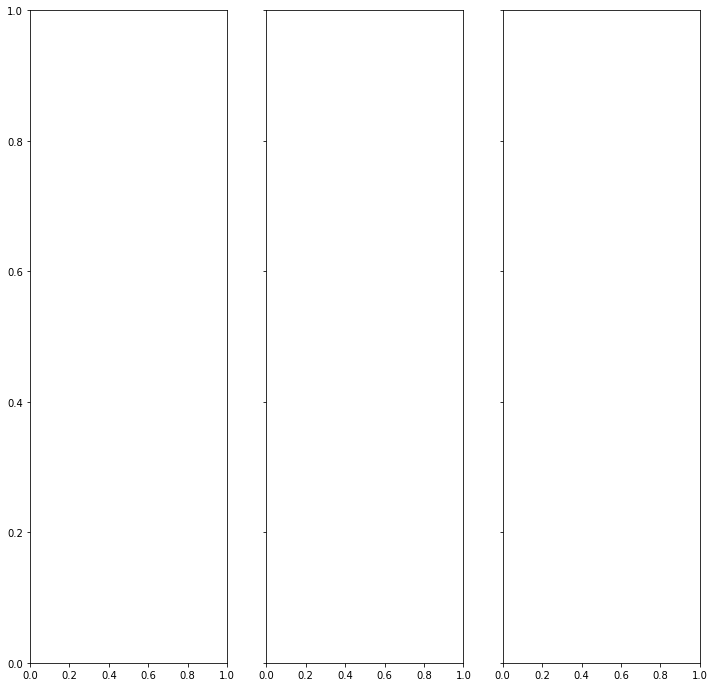

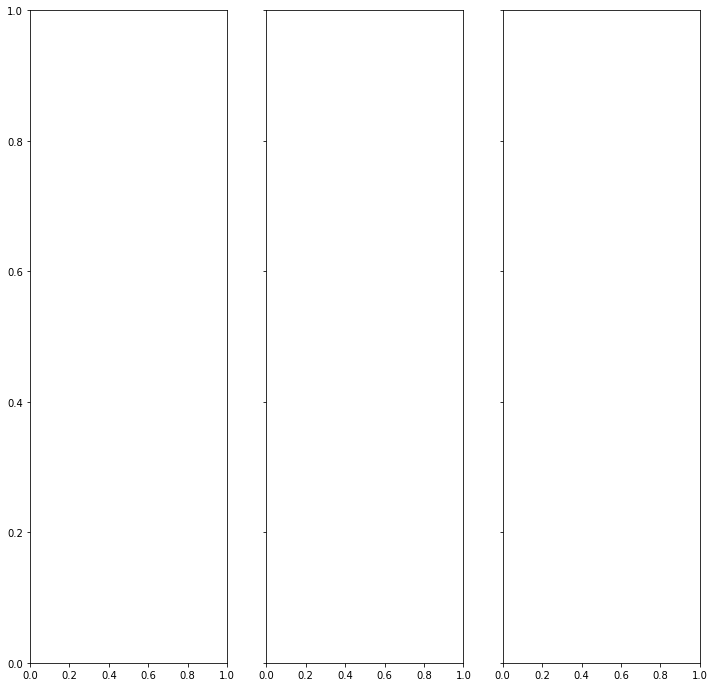

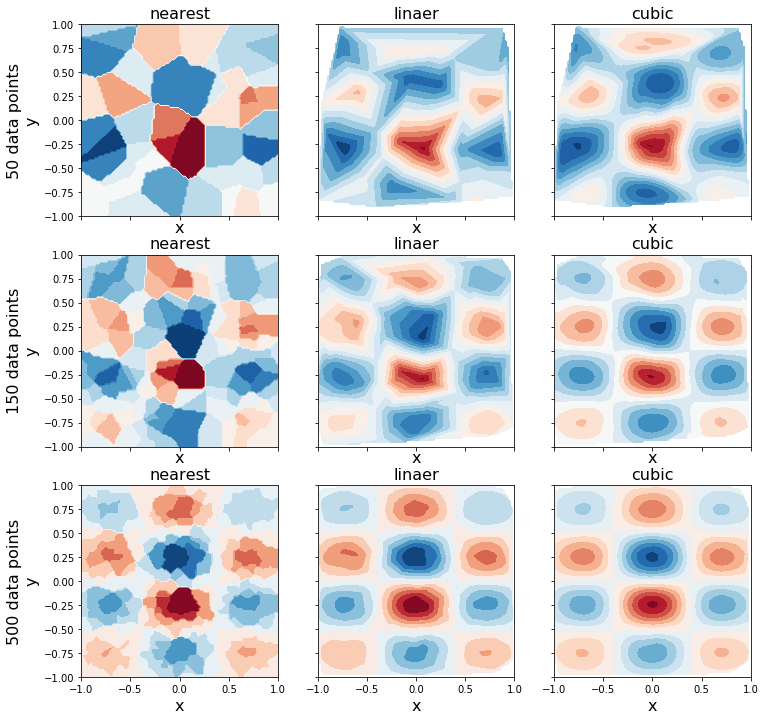

In [13]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

def z_interpolate(xdata, ydata, zdata):
    """
    Interpolate unstructured samples to super sampled structured grid
    """
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

# Plot resulting interpolant for increasing number of smaple points.
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    print(X.shape, Y.shape, Zi_0.shape)
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linaer", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

    for m in range(len(n_vec)):
        axes[idx, m].set_xlabel("x", fontsize=16)
    
plt.show()    


(50, 50) (50, 50) (50, 50)


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


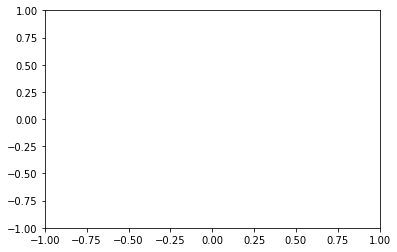

In [14]:
# Under sampling (WIP)
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# Many samples
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

# sparse regular grid
x = y = np.linspace(-1, 1, 5)
X, Y = np.meshgrid(x, y)
# Interpolate from unstructured to sparse structured grid
z_regular = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
# Construct interpolant on structured grid
f_interp = interpolate.interp2d(x, y, z_regular, kind='cubic')

# Evaluate interpolant, error from function and error from samples
# on plotting grid.
x = y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Xr = X.flatten()
Yr = Y.flatten()
Z_func = f(Xr,Yr)

Zi = f_interp(x, y)
Z_err_f = Z_func.reshape(len(x), len(x)) - Zi
#Z_err_sample = zdata - f_interp(xdata, ydata)

print(X.shape, Y.shape, Zi.shape)
# Plots
#fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
plt.contourf(X, Y, Zi, 15, cmap=plt.cm.RdBu)
#axes[0, 0].set_title("Interpolant", fontsize=16)
#axes[0, 1].imshow(Zerr_f, cmap=plt.cm.RdBu, interpolation='linear')
#axes[0, 1].set_title("Interpolant - function error", fontsize=16)
#axes[0, 1].scatter(xdata, ydata, c=Z_err_sample, cmap=plt.cm.RdBu)
#axes[0, 1].set_title("Interpolant - samples error", fontsize=16)
    
plt.show()    



## Numerická kvadratura

In [ ]:
# Bouncing ball, with instant bounce

import scipy.integrate as sint
import numpy as np
import matplotlib.pyplot as plt

def rhs(t, y):
    # gravity
    return [y[1], -1]

#t = np.linspace(0,10,100)
# initial height and velocity
y0 = [10, 0]
# max dt
dt=0.01

solver = sint.ode(rhs)
solver.set_integrator("vode", method="adams", with_jacobian=False,
                      max_step=dt
                     ) 
solver.set_initial_value(y0)

t_end = 100
time = []
solution_y = []
solution_dy = []
while solver.successful() and solver.t < t_end:
    # Integrate just single step
    y = solver.integrate(t_end, step=True)
    time.append(solver.t)
    solution_y.append(y[0])
    solution_dy.append(y[1])
    
    # check bounce
    if y[0] < 0.0:
        dy = - y[0]/(y_last[0] - y[0])
        dv = dy*(y_last[1] - y[1])
        #y0 = [-y[0], -y[1] - dv]
        y0 = [-y[0], - y_last[1]]
        solver.set_initial_value(y0, solver.t)
    y_last = y    
    #t_jump = np.inf
        

plt.plot(time, solution_y)
plt.plot(time, 10*np.ones(len(time)))
plt.show()
for t, y, dy in zip(time, solution_y, solution_dy):
    print(t, y, dy)
#X=np.array(X)
#print(X[1:]-X[:-1])

## Cvičení - ODE

Simulace skákajícího míčku. 

Lineární pohyb v proměnné $x$:
$$ x(t) = v_x t $$
... $v_x$ je daná horizontální rychlost.

Gravitační síla pro míček ve vzduchu:
$$ y''(t) = -g \text{ pro } y(t) > R$$
... $g$ je gravitační zrychlení.

Elastická síla působí na míček dotýkající se podložky:
$$ y''(t) = k(R - y(t)) \text{ pro } y(t) < R$$
... $R$ je poloměr míčku, $k$ je elastický koeficient míčku, volíme výrazně větší než $g$.

Postup řešení:
- Skalární rovnici druhého řádu pro $y$ převeďte na soustavu rovnic prvního řádu pro $y$ a $y'$.
- Implementujte python funkci pro vyhodnocení působící síly:

  ```
        def force(t, y):
            y_0, y_1 = y                 # y - je dvou složkový numpy vektor 
            ...
            return np.array([f_0, f_1])  # vrací se též numpy vektor, f_0 bude nula            
  ```
- použijte scipy.integrate.solve_ivp pro řešení rovnice
- zobrazte trajektorii míčku pomocí matplotlib

